<a href="https://colab.research.google.com/github/JayaDubey/MLnow_2.0/blob/main/Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

`Multivariate Linear Regression`

Objective: To compare the first exam and final exam grades of students

**Date Created**: 9 June 2021


**Author**:
 Jaya Dubey

**Reach out**:
[GitHub](https://github.com/JayaDubey) | [LinkedIn](https://www.linkedin.com/in/jaya-dubey-1196b5165/) |  [[Course Repository](https://github.com/JayaDubey/MLnow_2.0)]

[Link to Download the dataset](https://archive.ics.uci.edu/ml/datasets/Student+Performance)

## Setup

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [13]:
cd '/content/drive/MyDrive/Multivariate/archive'

/content/drive/MyDrive/Multivariate/archive


In [14]:
ls

covid_19_data.csv                      time_series_covid_19_deaths.csv
student-por.csv                        time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv     time_series_covid_19_recovered.csv
time_series_covid_19_confirmed_US.csv


In [15]:
import os

In [16]:
import pandas as pd #working with csv or excel files
import numpy as np #working with numbers/ arrays/ tensors
import tensorflow as tf #framework
from tensorflow import keras #API / library 
import os #using os commands between the python language

In [17]:
gradeData = pd.read_csv('student-por.csv', sep=';') #load the csv file as dataframe

In [ ]:
gradeData.head(10) #print the first ten rows of the dataframe

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,reputation,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,home,mother,1,2,0,no,no,no,no,yes,yes,yes,no,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,home,mother,2,2,0,yes,yes,no,no,yes,yes,no,no,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,home,mother,1,2,0,no,yes,no,no,yes,yes,yes,no,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,home,mother,1,2,0,no,yes,no,yes,yes,yes,yes,no,5,5,1,1,1,5,0,12,12,13


#Data Proccessing
Categorical to Numerical conversion

In [18]:
print(f'school: {gradeData.school.unique()}')
print(f'sex: {gradeData.sex.unique()}')
print(f'address: {gradeData.address.unique()}')
print(f'Mjob: {gradeData.Mjob.unique()}')
print(f'Fjob: {gradeData.Fjob.unique()}')
print(f'higher: {gradeData.higher.unique()}')

school: ['GP' 'MS']
sex: ['F' 'M']
address: ['U' 'R']
Mjob: ['at_home' 'health' 'other' 'services' 'teacher']
Fjob: ['teacher' 'other' 'services' 'health' 'at_home']
higher: ['yes' 'no']


In [19]:
#binary valued
gradeData['school'] = gradeData['school'].apply({'GP':1, 'MS':0}.get)
gradeData['sex'] = gradeData['sex'].apply({'F':1, 'M':0}.get)
gradeData['address'] = gradeData['address'].apply({'U':1, 'R':0}.get)
gradeData['higher'] = gradeData['higher'].apply({'yes':1, 'no':0}.get)


#multi-valued
gradeData['Mjob'] = gradeData['Mjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)
gradeData['Fjob'] = gradeData['Fjob'].apply({'at_home':1, 'health':2, 'other':3, 'services':4, 'teacher':5}.get)

gradeData.head(15)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,1,GT3,A,4,4,1,5,course,mother,2,2,0,yes,no,no,no,yes,1,no,no,4,3,4,1,1,3,4,0,11,11
1,1,1,17,1,GT3,T,1,1,1,3,course,father,1,2,0,no,yes,no,no,no,1,yes,no,5,3,3,1,1,3,2,9,11,11
2,1,1,15,1,LE3,T,1,1,1,3,other,mother,1,2,0,yes,no,no,no,yes,1,yes,no,4,3,2,2,3,3,6,12,13,12
3,1,1,15,1,GT3,T,4,2,2,4,home,mother,1,3,0,no,yes,no,yes,yes,1,yes,yes,3,2,2,1,1,5,0,14,14,14
4,1,1,16,1,GT3,T,3,3,3,3,home,father,1,2,0,no,yes,no,no,yes,1,no,no,4,3,2,1,2,5,0,11,13,13
5,1,0,16,1,LE3,T,4,3,4,3,reputation,mother,1,2,0,no,yes,no,yes,yes,1,yes,no,5,4,2,1,2,5,6,12,12,13
6,1,0,16,1,LE3,T,2,2,3,3,home,mother,1,2,0,no,no,no,no,yes,1,yes,no,4,4,4,1,1,3,0,13,12,13
7,1,1,17,1,GT3,A,4,4,3,5,home,mother,2,2,0,yes,yes,no,no,yes,1,no,no,4,1,4,1,1,1,2,10,13,13
8,1,0,15,1,LE3,A,3,2,4,3,home,mother,1,2,0,no,yes,no,no,yes,1,yes,no,4,2,2,1,1,1,0,15,16,17
9,1,0,15,1,GT3,T,3,4,3,3,home,mother,1,2,0,no,yes,no,yes,yes,1,yes,no,5,5,1,1,1,5,0,12,12,13


In [21]:
#Consider these columns from the DataFrame

gradeData = gradeData[['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime', 'studytime', 'absences', 'G1', 'G2', 'G3']]
gradeData.head()

,school,sex,address,Mjob,Fjob,higher,freetime,studytime,absences,G1,G2,G3
0,1,1,1,1,5,1,3,2,4,0,11,11
1,1,1,1,1,3,1,3,2,2,9,11,11
2,1,1,1,1,3,1,3,2,6,12,13,12
3,1,1,1,2,4,1,2,3,0,14,14,14
4,1,1,1,3,3,1,3,2,0,11,13,13


In [22]:
gradeData.to_csv('cleanGradeData.csv')

In [23]:
ls

cleanGradeData.csv                  time_series_covid_19_confirmed_US.csv
covid_19_data.csv                   time_series_covid_19_deaths.csv
student-por.csv                     time_series_covid_19_deaths_US.csv
time_series_covid_19_confirmed.csv  time_series_covid_19_recovered.csv


## Data visualization

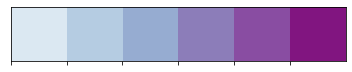

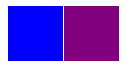

In [24]:
import seaborn as sns
sns.palplot(sns.color_palette('BuPu')) #Blue to purple colors
pal = sns.color_palette('BuPu', 10) #print 6 color shades from Blue to purple
pal.as_hex() #set hex code values for colors

import matplotlib.pyplot as plt
plt.style.use(['seaborn'])
sns_colors = ['#0000FF', '#800080'] #Blue Purple hex codes
sns.set_palette(sns_colors) #set the palette as sns_colors 
sns.palplot(sns.color_palette(sns_colors)) #plot the color codes

In [25]:
gradeData.columns #columns in the dataframe

Index(['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

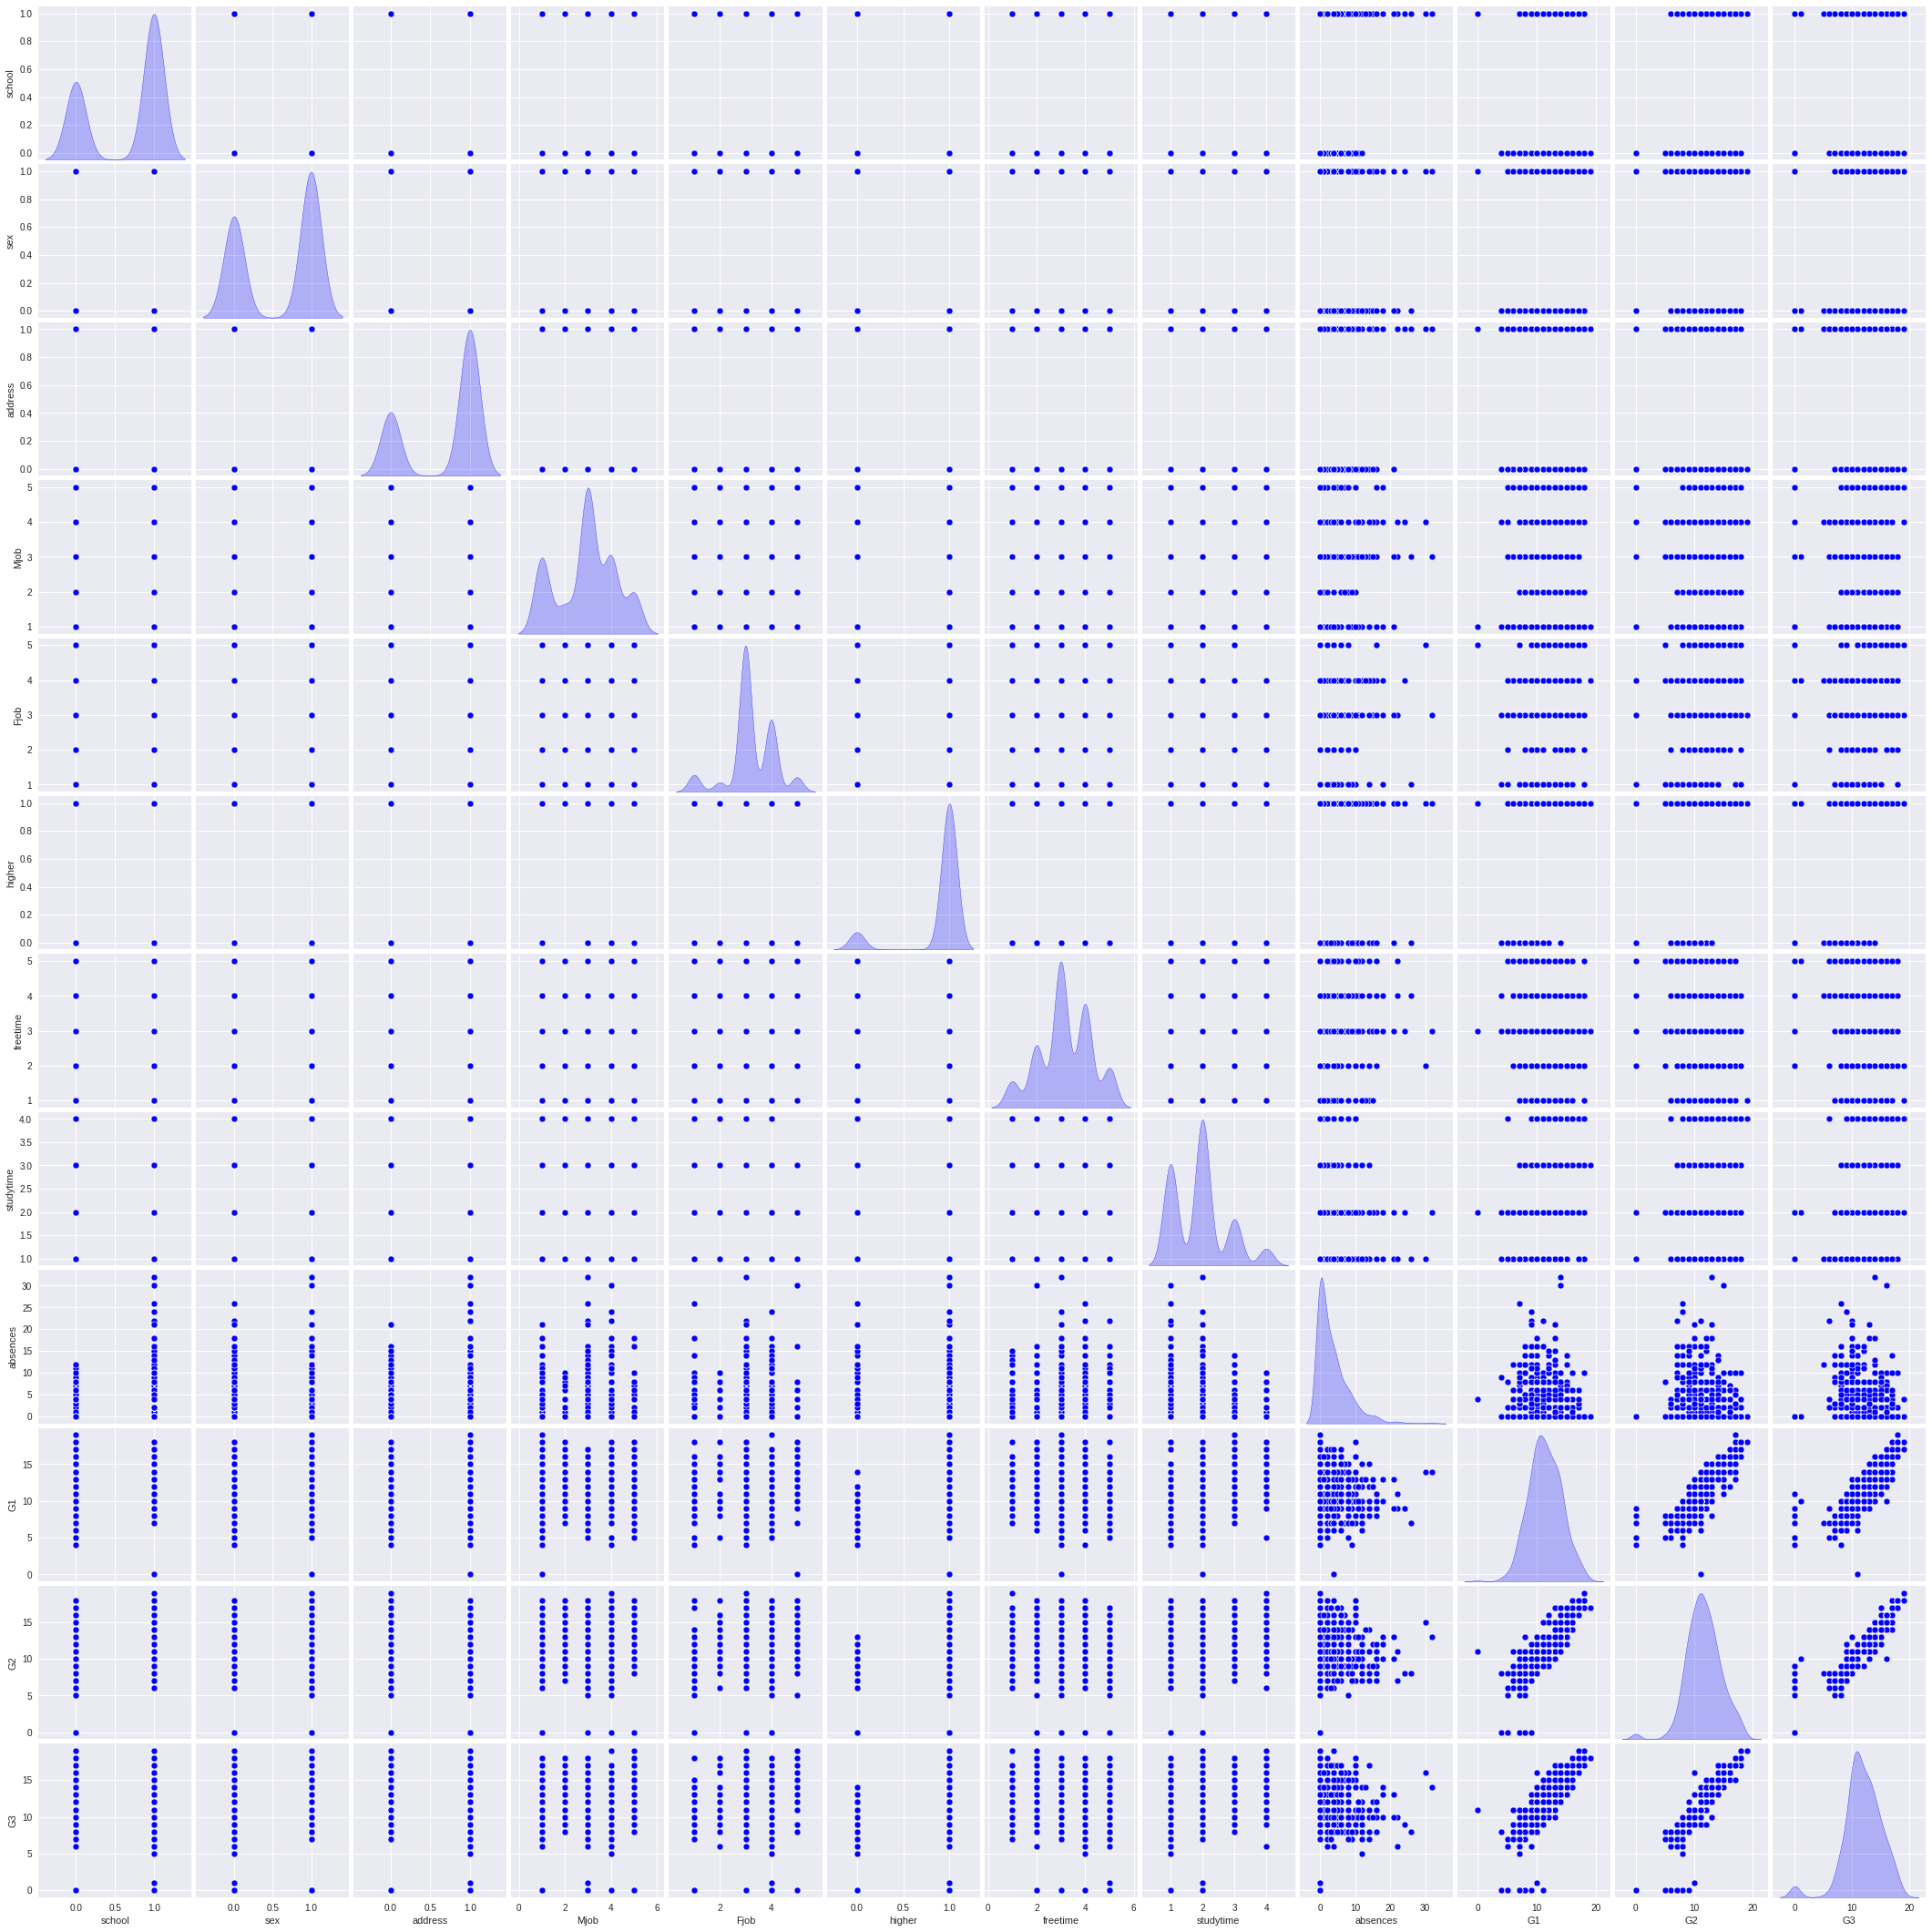

In [27]:
#pairplot for all the values

sns.pairplot(gradeData,
             x_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
             y_vars = ['school', 'sex', 'address', 'Mjob', 'Fjob', 'higher', 'freetime',
       'studytime', 'absences', 'G1', 'G2', 'G3'],
       diag_kind='kde'
             )

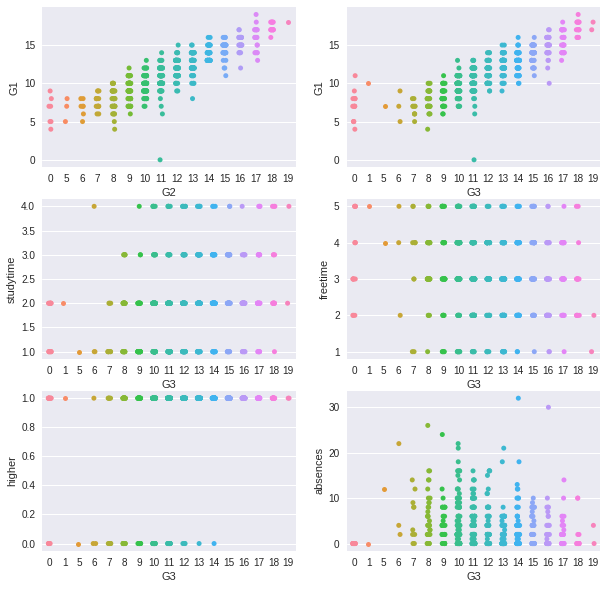

In [28]:
# stripplots plotted as subplots on one main plot with the ax parameter

fig, axarr = plt.subplots(3,2, figsize=(10,10))

sns.stripplot(y='G1', x='G2', data=gradeData, hue=None, ax=axarr[0][0])
sns.stripplot(y='G1', x='G3', data=gradeData, hue=None, ax=axarr[0][1])
sns.stripplot(y='studytime', x='G3', data=gradeData, hue=None, ax=axarr[1][0])
sns.stripplot(y='freetime', x='G3', data=gradeData, hue=None,  ax=axarr[1][1])
sns.stripplot(y='higher', x='G3', data=gradeData, hue=None, ax=axarr[2][0])
sns.stripplot(y='absences', x='G3', data=gradeData, hue=None, ax=axarr[2][1])

##Data Split

In [30]:
#80-20 train-test percent split

trainDataset = gradeData.sample(frac=0.8, random_state=0) 
testDataset = gradeData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
532       0    0        1     2     4  ...          2         2   9   7   8
375       1    1        1     1     1  ...          3         0  14  14  15
306       1    0        0     3     3  ...          2         6  15  16  16
625       0    1        1     1     4  ...          1         0  10  10  10
480       0    1        1     1     4  ...          1         0   9   9  10

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  12  12  13
11       1    1        1     4     3  ...          3         0  10  12  13
19       1    0        1     2     3  ...          1         6  12  12  12
23       1    0        1     3     3  ...          2         2  10  10  10
25       1    1        1     4     4  ...          1         6  10  11  12

[5 rows x 12 columns]


In [31]:
print(trainDataset.shape)
print(testDataset.shape)

(519, 12)
(130, 12)


In [36]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
532       0    0        1     2     4  ...          2         2   9   7   8
375       1    1        1     1     1  ...          3         0  14  14  15
306       1    0        0     3     3  ...          2         6  15  16  16
625       0    1        1     1     4  ...          1         0  10  10  10
480       0    1        1     1     4  ...          1         0   9   9  10

[5 rows x 12 columns]
    school  sex  address  Mjob  Fjob  ...  studytime  absences  G1  G2  G3
9        1    0        1     3     3  ...          2         0  12  12  13
11       1    1        1     4     3  ...          3         0  10  12  13
19       1    0        1     2     3  ...          1         6  12  12  12
23       1    0        1     3     3  ...          2         2  10  10  10
25       1    1        1     4     4  ...          1         6  10  11  12

[5 rows x 12 columns]


In [37]:
#Removing the G3 grade(final term marks)column and saving it into the labels variable

trainLabels = trainFeatures.pop('G3')
testLabels = testFeatures.pop('G3')

print(trainLabels.head())
print(testLabels.head())

532     8
375    15
306    16
625    10
480    10
Name: G3, dtype: int64
9     13
11    13
19    12
23    10
25    12
Name: G3, dtype: int64


In [38]:
print(trainFeatures.head())
print(testFeatures.head())

     school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
532       0    0        1     2     4  ...         2          2         2   9   7
375       1    1        1     1     1  ...         3          3         0  14  14
306       1    0        0     3     3  ...         2          2         6  15  16
625       0    1        1     1     4  ...         2          1         0  10  10
480       0    1        1     1     4  ...         4          1         0   9   9

[5 rows x 11 columns]
    school  sex  address  Mjob  Fjob  ...  freetime  studytime  absences  G1  G2
9        1    0        1     3     3  ...         5          2         0  12  12
11       1    1        1     4     3  ...         2          3         0  10  12
19       1    0        1     2     3  ...         1          1         6  12  12
23       1    0        1     3     3  ...         4          2         2  10  10
25       1    1        1     4     4  ...         2          1         6  10  11

##Model Development

In [41]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3) #formula
print(inputNeurons)

8


In [42]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [43]:
numEpochs = 2000
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)

Epoch 1/2000
17/17 [==============================] - 1s 14ms/step - loss: 10.5383 - mae: 10.5383 - mse: 119.6173 - val_loss: 10.1578 - val_mae: 10.1578 - val_mse: 108.6200
Epoch 2/2000
17/17 [==============================] - 0s 2ms/step - loss: 9.2524 - mae: 9.2524 - mse: 92.1418 - val_loss: 8.6374 - val_mae: 8.6374 - val_mse: 78.3600
Epoch 3/2000
17/17 [==============================] - 0s 3ms/step - loss: 7.5578 - mae: 7.5578 - mse: 61.6506 - val_loss: 6.6269 - val_mae: 6.6269 - val_mse: 46.0314
Epoch 4/2000
17/17 [==============================] - 0s 3ms/step - loss: 5.3863 - mae: 5.3863 - mse: 31.6627 - val_loss: 4.1002 - val_mae: 4.1002 - val_mse: 18.0386
Epoch 5/2000
17/17 [==============================] - 0s 3ms/step - loss: 2.7214 - mae: 2.7214 - mse: 9.5277 - val_loss: 1.2875 - val_mae: 1.2875 - val_mse: 2.9155
Epoch 6/2000
17/17 [==============================] - 0s 3ms/step - loss: 1.0902 - mae: 1.0902 - mse: 2.5215 - val_loss: 1.0121 - val_mae: 1.0121 - val_mse: 2.3851
E

##Result Analysis


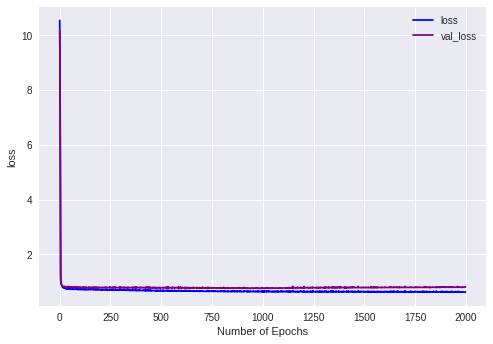

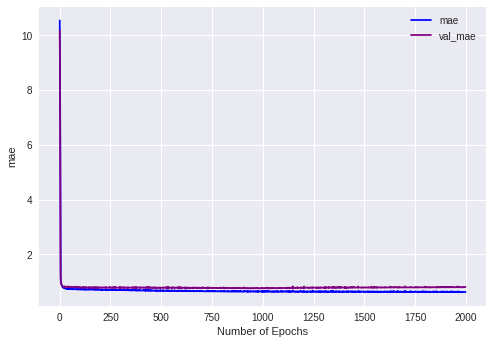

In [44]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [45]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[12.465939  12.4894495 12.522813  10.814158  11.689517  12.694675
 14.021996  14.575376  11.676756  15.104691  10.389829  17.599926
 12.733299  15.946359  13.53944   12.091044  12.080982  11.431463
 12.210209  12.975209  12.175176  15.834779  14.093968  12.718577
 13.842699  13.5134535 13.646885  14.407461  15.274869  13.56463
 13.229692  14.568777  11.622634  10.203287  14.773117  11.708924
 14.60018    9.551297  11.340488  13.978193  11.985833   8.295965
  8.363979   8.826185  10.6895895 12.644326  16.187572   9.838251
 10.114722  13.791448  14.115255   9.524011  15.67772   13.541824
 11.758473  12.944642   9.906163   7.201042   9.179983  12.193136
 14.89182   14.806159  11.620634  10.874554  11.18898    9.67367
 12.146598  12.7927885 11.351876  12.597647  16.272623   8.944944
 11.622471  16.759443  15.508223  10.642028  10.575526  13.354154
 17.157131  15.553706   9.578307   9.048141  10.820866  11.786099
 14.26594   11.855731  14.790543  11.579945  16.644573  12.54576
 16.625816  1

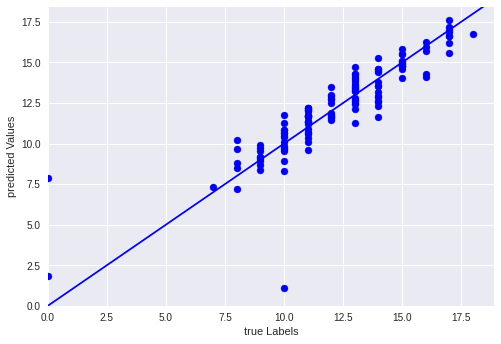

In [46]:
def predPlot(labels,preds):
  plt.scatter(labels, preds)
  plt.xlabel('true Labels')
  plt.ylabel('predicted Values')
  plt.xlim([0, plt.xlim()[1]])
  plt.ylim([0, plt.ylim()[1]])
  plt.plot([-100, 100], [-100,100])
  plt.show()

predPlot(testLabels, testPreds)

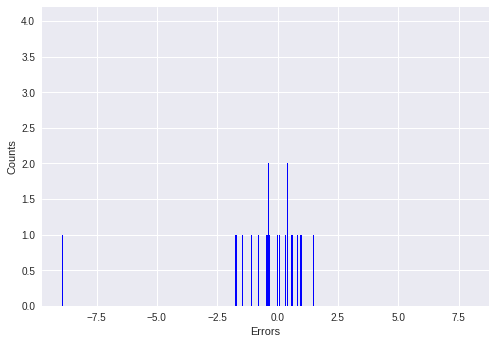

In [47]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)

##Saving Models

In [49]:
import os
modelName = f'model_01.h5'
model.save(f'{os.getcwd()}/{modelName}')
model = tf.keras.models.load_model(f'{os.getcwd()}/{modelName}')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 96        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________
